# Meninjau Faktor yang Mempengaruhi Penjualan Sebuah Mobil

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Dalam penelitian kali ini, akan menganalisis faktor apa saja yang mempengaruhi penjualan sebuah kendaraan sesuai dengan yang disajikan di dalam tabel.
Untuk bisa mendapatkan karakteristik tersebut, maka akan menguji beberapa hipotesis yang didapat dari dalam tabel.

## Tujuan dan Tahapan:
Tujuan dari pengolahan data kali ini adalah:
1. Mencari faktor-faktor yang memiliki korelasi dalam penjualan kendaraan.
2. Menganalisa outlier yang terdapat dalam setiap kolom numerik dan kategorik.
3. Mengetahui jenis kendaraan yang paling banyak dijual dan harga jual rata-rata dari kendaraan tesebut.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Fungsi di atas merupakan fungsi untuk Conditional Fill Missing Value, yang mana akan digunakan untuk mengisi nilai yang hilang dengan mengamati kolom-kolom yang memiliki keterkaitan. Fungsi ini diletakkan di awal untuk mempermudah penggunaan dari fungsinya.

### Memuat Data

In [3]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.shape

(51525, 13)

In [5]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Dari informasi umum yang ditampilkan, terdapat baris sejumlah 51525 dan kolom sebanyak 13. Sample yang ditampilkan telah menunjukkan adanya nilai 'NaN' pada beberapa kolom dalam tabel. Untuk itu akan ditinjau lebih lanjut per kolom agar bisa disimpulkan cara terbaik untuk mengisi nilai 'NaN' per kolom pada tabel.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Dari hasil diatas, kita dapat melihat beberapa kolom dengan type data yang tidak sesuai, seperti model_year yang seharusnya int64 tetapi tertulis float, karena tahun dari mobil itu keluar pasti tidak berbentuk pecahan, lalu pada kolom cylinders yang sama permasalahannya dengan model_year, yang terakhir adalah date_posted dimana seharusnya datanya bertipe datetime.

In [7]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Ada 5 kolom yang memiliki nilai yang hilang. Kolom itu adalah model_year, cylinders, odometer, paint_color, dan is_4wd. Dari kelima kolom tersebut, kolom is_4wd memiliki nilai 'NaN' terbanyak jika dibandingkan dengan kolom lainnya dan kolom model_year memiliki nilai 'NaN' paling sedikit.

In [9]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Kesimpulan dan Langkah-Langkah Selanjutnya

Data awal memiliki beberapa kesalahan dalam type data di beberapa kolom dan juga memiliki nilai yang hilang di kolomnya. Langkah yang akan dilakukan selanjutnya adalah mengisi nilai yang hilang dengan meninjau hubungannya dengan kolom-kolom lain dan mengubah type data pada kolom agar dapat mempermudah analisis yang akan dilakukan.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Untuk bisa mengatasi nilai yang hilang, kita harus menelusuri kolom yang memiliki nilai yang hilang lebih lanjut, agar bisa mengetahui penyebab nilai yang hilang beserta cara mengatasinya.

**Kolom 'paint_color'**

In [10]:
print(df['paint_color'].nunique())

12


In [11]:
print(df['paint_color'].unique())

[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']


In [12]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [13]:
print(df['paint_color'].unique())

['unknown' 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']


Kolom paint_color menjelaskan warna kendaraan yang dijual, sebagai mana kita ketahui bahwa warna dari kendaraan hanya diketahui oleh penjual/pemiliknya nilai 'NaN' akan diganti dengan 'unknown'.

**Kolom 'is_4wd'**

In [14]:
print(df['is_4wd'])

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
51520    NaN
51521    NaN
51522    NaN
51523    NaN
51524    NaN
Name: is_4wd, Length: 51525, dtype: float64


In [15]:
print(df['is_4wd'].unique())

[ 1. nan]


In [16]:
print(df['is_4wd'].nunique())

1


In [17]:
df['is_4wd'] = df['is_4wd'].fillna(0).astype('int')

In [18]:
print(df['is_4wd'].unique())

[1 0]


Kolom is_4wd menjelaskan apakah mobil tersebut memiliki sistem penggerak 4 roda atau tidak. Dari nilai unik yang didapat hanya ada 1 dan 'NaN', secara sekilas kita dapat menyimpulkan nilai 'NaN' adalah mobil yang tidak memiliki penggerak 4 roda, sehingga bisa kita ganti menjadi 0 (Penanda mobil tersebut tidak memiliki penggerak 4 roda).

**Kolom 'odometer'**

In [19]:
df_odo_not_na = df[df['odometer'].notna()].reset_index(drop=True)
df_odo_not_na

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43628,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0,2018-08-10,63
43629,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
43630,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
43631,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32


Kolom odometer menjelaskan tentang jarak tempuh mobil sejak dibeli oleh pemilik hingga saat diposting ke dalam situs penjualan.

<AxesSubplot:xlabel='odometer'>

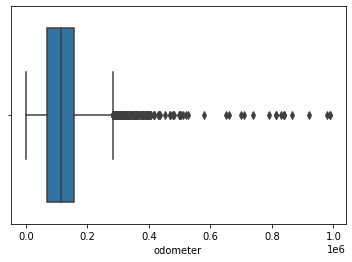

In [20]:
sns.boxplot(df_odo_not_na['odometer'])

Karena dari distribusi datanya terdapat outlier yang sangat besar, nilai yang diambil untuk mengisi nilai yang hilang adalah median dari odometer.

In [21]:
median_odometer = df_odo_not_na['odometer'].median()
median_odometer

113000.0

In [22]:
df['odometer'].fillna(median_odometer, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


**Kolom 'cylinders'**

In [24]:
print(df['cylinders'].unique())

[ 6.  4.  8. nan  5. 10.  3. 12.]


Kolom cylinders menjelaskan jumlah silinder yang dimiliki oleh kendaraan tersebut. Dalam kolom ini kita bisa mengganti dengan nilai 'NaN' dengan melakukan peninjauan pada kolom lain yang memiliki keterkaitan, mengingat silinder pada kendaraan bergantung pada tipe, merk, dan juga tahun pembuatan. Sehingga tidak bisa mengambil nilai seperti mean atau median. Dalam hal ini kita akan mencoba melihat dari kolom model, setelah itu, model mobil yang sama akan kita ambil nilai cylindernya untuk mengganti nilai 'NaN'.

In [25]:
print(df['model'].nunique())

100


In [26]:
sorted(df['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

Setelah melihat nilai unik pada kolom model, kita pun menemukan beberapa kejanggalan dalam data, terdapat duplikat dengan karakter yang berbeda seperti pada model 'ford f150' yang muncul berkali-kali dengan penulisan yang berbeda. Maka dari itu akan menyamakan penulisan terlebih dahulu sebelum mengisi nilai yang hilang.

In [27]:
df.loc[df['model'] == 'ford f-150', 'model'] = 'ford f 150'
df.loc[df['model'] == 'ford f-250', 'model'] = 'ford f 250'
df.loc[df['model'] == 'ford f-250 sd', 'model'] = 'ford f 250 sd'
df.loc[df['model'] == 'ford f-250 super duty', 'model'] = 'ford f 250 sd'
df.loc[df['model'] == 'ford f-350 sd', 'model'] = 'ford f 350 sd'
df.loc[df['model'] == 'ford f150 supercrew cab xlt', 'model'] = 'ford f 150 supercrew cab xlt'
df.loc[df['model'] == 'ford f250', 'model'] = 'ford f 250'
df.loc[df['model'] == 'ford f250 super duty', 'model'] = 'ford f 250'
df.loc[df['model'] == 'ford f350', 'model'] = 'ford f 350'
df.loc[df['model'] == 'ford f350 super duty', 'model'] = 'ford f 350 sd'
df.loc[df['model'] == 'ford f150', 'model'] = 'ford f 150'

In [28]:
sorted(df['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f 150',
 'ford f 150 supercrew cab xlt',
 'ford f 250',
 'ford f 250 sd',
 'ford f 350',
 'ford f 350 sd',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra',
 'gmc sierra 

In [29]:
print(df['model'].nunique())

95


In [30]:
df.pivot_table(index='model', columns='cylinders', values='price', aggfunc='count')

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0
model,,,,,,,
acura tl,NaN,3.0,NaN,208.0,NaN,NaN,NaN
bmw x5,NaN,NaN,NaN,200.0,51.0,NaN,NaN
buick enclave,NaN,1.0,NaN,245.0,1.0,NaN,NaN
cadillac escalade,NaN,NaN,NaN,3.0,290.0,1.0,NaN
chevrolet camaro,NaN,9.0,NaN,223.0,106.0,34.0,NaN
...,...,...,...,...,...,...,...
toyota sienna,NaN,8.0,NaN,285.0,1.0,NaN,NaN
toyota tacoma,NaN,240.0,2.0,486.0,2.0,NaN,NaN
toyota tundra,NaN,1.0,NaN,33.0,500.0,13.0,NaN


Dari pivot tabel kita bisa melihat sekilas persebaran data untuk jumlah cylinder dari setiap model mobil. Melihat persebaran nilainya, akan digunakan median untuk mengisi nilai 'NaN' pada cylinder ditinjau dari kolom model kendaraan.

In [31]:
fill_missing_value (df, 'model', 'cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,NaN,ford f 150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f 150,fair,8.0,gas,113000.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


In [32]:
df['cylinders'] = df['cylinders'].astype('int')

In [33]:
df['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3, 12])

**Kolom 'model_year'**

In [34]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [35]:
df['model_year'].nunique()

68

In [36]:
print(df.groupby('model')['model_year'].median())

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 95, dtype: float64


Setelah melihat nilai unik dari kolom model_year, kolom ini berisi tahun dimana mobil tersebut diproduksi, nilai 'NaN' bisa disebabkan karena si pemilik tidak memasukkan nilainya. Setiap mobil memiliki karakteristik yang berkaitan pada kolom lainnya, sehingga nilai yang hilang bisa kita ganti dengan conditional fill missing value dengan melihat kolom lain yang dapat membantu seperti 'model'. Dari kolom 'model' akan dicari median dari 'model_year' yang memiliki keterkaitan.

In [37]:
fill_missing_value(df, 'model', 'model_year')
df['model_year'] = df['model_year'].astype('int')

In [38]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f 150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f 150,fair,8,gas,113000.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 5.1+ MB


## Memperbaiki Tipe Data

Untuk tipe data yang bermasalah sebelumnya sudah diperbaiki langsung ketika mengisi nilai yang hilang, seperti kolom 'cylinders', 'is_4wd', dan 'model_year'. Masih tersisa satu kolom lagi yang harus diperbaiki yaitu 'date_posted', kita akan mengubah type kolom menjadi datetime.

In [40]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


## Memperbaiki Kualitas Data

In [42]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['year_posted'] = df['date_posted'].dt.year

In [43]:
df['date_ads'] = df['date_posted'].dt.day

In [44]:
df['month_posted'] = df['date_posted'].dt.month

In [45]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = df['year_posted'] - df['model_year']

In [46]:
df.loc[df['age_car'] == 0, 'age_car'] = 1

Kondisi dengan age_car yang bernilai 0 akan diubah menjadi 1, karena nilai 0 akan mempengaruhi rata-rata odometer, walaupun dijual dalam kurun waktu kurang dari 1 tahun, kondisi mobil juga termasuk ke dalam mobil bekas sehingga dihitung menjadi 1 tahun.

In [47]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['average_distance'] = df['odometer'] / df['age_car']

In [48]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def car_condition(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 5
    elif condition == 'excellent':
        return 5
    elif condition == 'good':
        return 5
    elif condition == 'fair':
        return 5
    else:
        return 0

In [49]:
df['cond_category'] = df['condition'].apply(car_condition)

In [50]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,23,6,7,20714.285714,5
1,25500,2011,ford f 150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,19,10,7,12672.142857,5
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,7,2,6,18333.333333,5
3,1500,2003,ford f 150,fair,8,gas,113000.0,automatic,pickup,unknown,0,2019-03-22,9,2019,22,3,16,7062.500000,5
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,4,2,40451.500000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2018,3,10,5,17627.200000,5
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2018,14,11,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2018,15,11,9,14222.222222,5
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2018,2,7,5,27914.600000,5


## Memeriksa Data yang Sudah Bersih

In [51]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int64         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int64         
 14  date_ads          5152

In [52]:
# tampilkan sampel data 
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,23,6,7,20714.285714,5
1,25500,2011,ford f 150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,19,10,7,12672.142857,5
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,7,2,6,18333.333333,5
3,1500,2003,ford f 150,fair,8,gas,113000.0,automatic,pickup,unknown,0,2019-03-22,9,2019,22,3,16,7062.500000,5
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,4,2,40451.500000,5
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2018,20,6,4,14488.500000,5
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,2018,27,12,3,26404.000000,5
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,2019,7,1,6,18245.500000,5
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,2018,16,7,6,17362.333333,5
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2019,15,2,11,13381.000000,5


## Mempelajari Parameter Inti 
Parameter-parameter yang ditinjau dan memiliki kemungkinan mempengaruhi harga suatu mobil:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

**Kolom 'price'**

<AxesSubplot:xlabel='price'>

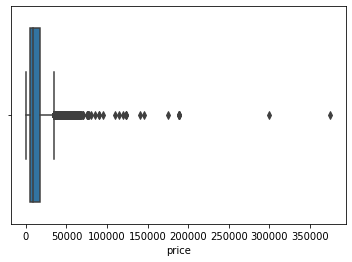

In [53]:
# Melihat outlier pada kolom 'price'
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

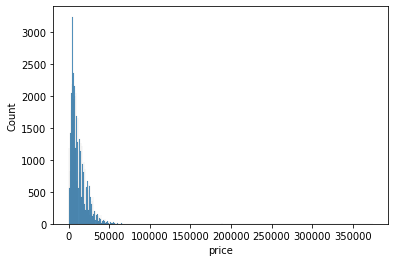

In [54]:
# Histogram pada kolom 'price'
sns.histplot(df['price'])

Pada kolom 'price', kita bisa melihat ada banyak sekali outlier yang ada pada saat menampilkan boxplot. Selain itu ketika kita menampilkan grafik histogram, kita bisa melihat ada nilai yang menjulang tinggi yang dekat dengan 0 pada sumbu x akan tetapi sulit untuk menentukan outlier dengan histogram. Dari boxplot juga didapat bahwa data pada kolom 'price' distribusi datanya cenderung menjulur ke arah kanan (positive skewness) karena whisker atas lebih panjang dan terdapat banyak outlier setelahnya.

**Kolom 'cylinders'**

<AxesSubplot:xlabel='cylinders'>

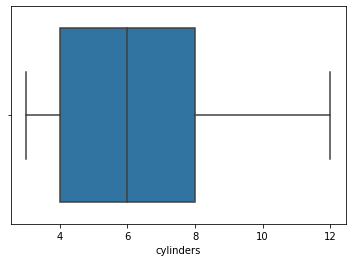

In [55]:
# Melihat outlier di kolom 'cylinders'
sns.boxplot(df['cylinders'])

<AxesSubplot:xlabel='cylinders', ylabel='count'>

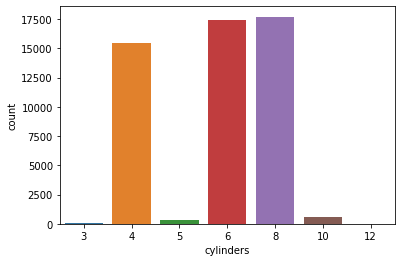

In [56]:
sns.countplot(df['cylinders'])

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

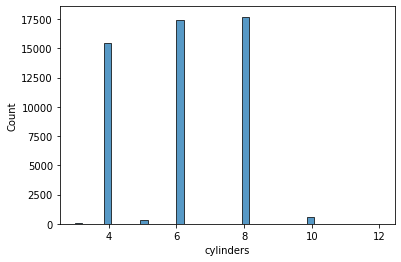

In [57]:
# Histogram pada kolom 'cylinders'
sns.histplot(df['cylinders'])

Pada umumnya mobil yang beredar di publik memiliki jumlah silinder 4, 6, dan 8. Teapi tidak menutup kemungkinan adanya jumlah silinder diluar ketiga angka tersebut dan mungkin jumlahnya sangat sedikit untuk saat ini. Sesuai dengan grafik yang ditampilkan, bahwa kendaraan didominasi oleh kendaraan yang memiliki silinder 4, 6, dan 8.

**Kolom 'age_car'**

<AxesSubplot:xlabel='age_car'>

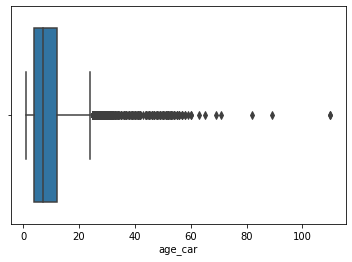

In [58]:
# Melihat outlier pada kolom 'age_car'
sns.boxplot(df['age_car'])

<AxesSubplot:xlabel='age_car', ylabel='Count'>

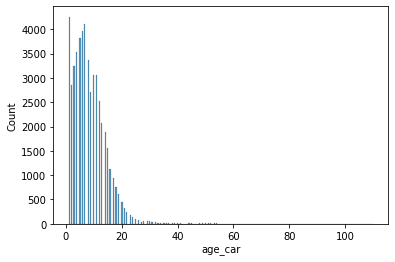

In [59]:
sns.histplot(df['age_car'])

Dari grafik yang kita dapatkan, kolom 'age_car' memiliki banyak sekali outlier. Dari boxplot juga didapat bahwa data pada kolom 'age_car' distribusi datanya cenderung menjulur ke arah kanan (positive skewness) karena whisker atas lebih panjang dan terdapat banyak outlier setelahnya.

**Kolom 'odometer'**

<AxesSubplot:xlabel='odometer'>

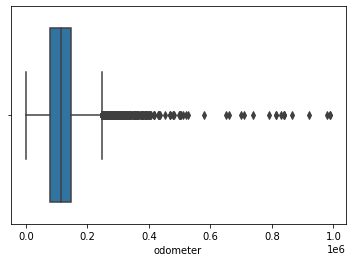

In [60]:
# Melihat outier pada kolom 'odometer'
sns.boxplot(df['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

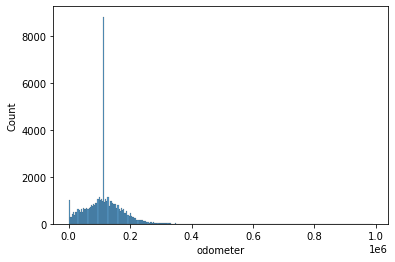

In [61]:
sns.histplot(df['odometer'])

Kolom 'odometer' menjelaskan tentang jarak tempuh mobil itu sendiri. Dari boxplot, kita mendapatkan banyak sekali outlier, yang menandakan memang jarak tempuh setiap mobil memiliki perbedaan yang sangat jauh dengan mobil-mobil lainnya. Lalu pada histogram kita mendapatkan sebuah garis yang mejuang cukup tinggi dibandingkan dengan garis lainnya. Dari boxplot juga terlihat bahwa distribusi datanya cenderung menjulur ke arah kanan (positive skewness) karena whisker atas lebih panjang dan terdapat banyak outlier setelahnya. 

**Kolom 'condition'**

<AxesSubplot:xlabel='condition', ylabel='count'>

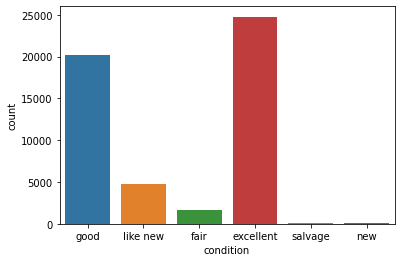

In [62]:
# Melihat outlier pada kolom 'condition'
sns.countplot(df['condition'])

<AxesSubplot:xlabel='condition', ylabel='Count'>

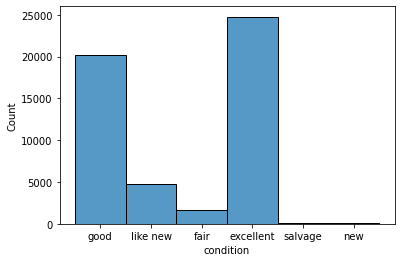

In [63]:
sns.histplot(df['condition'])

Kolom 'condition', adalah kolom kategorikal yang menjelaskan kondisi terkini dari mobil tersebut. Secara grafik histogram mobil yang terjual paling banyak memiliki kondisi yang excellent dan good.

## Mempelajari dan Menangani Outlier

In [65]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793188,6.121067,115162.352179,0.496303,39.55476,2018.307462,15.449491,6.628491,8.556041,19130.416203,4.988840
std,10040.803015,6.099653,1.657457,59909.264385,0.499991,28.20427,0.461447,8.736521,3.474134,6.058207,16928.178617,0.235955
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,0.000000,19.00000,2018.000000,8.000000,3.000000,4.000000,10310.842105,5.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000,2018.000000,15.000000,7.000000,7.000000,15062.500000,5.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,53.00000,2019.000000,23.000000,10.000000,12.000000,22240.000000,5.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,31.000000,12.000000,110.000000,373200.000000,5.000000


In [79]:
def upper_lower_whisker(dataframe, column_name):
    Q1  = dataframe[column_name].quantile(0.25)
    Q3  = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

Diatas adalah fungsi yang bisa digunakan untuk menghapus outlier didalam beberapa kolom secara langsung.

In [82]:
list_of_selected_column = ['price', 'age_car', 'odometer']

df_final = df.copy()

for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower_whisker, upper_whisker = upper_lower_whisker(df, column)
    df_final = df_final[(df_final[column] > lower_whisker) & (df_final[column] < upper_whisker )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  age_car
cleaning outlier on  age_car  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


Berdasarkan parameter inti yang didapat sebelumnya, dilakukan looping untuk mempermudah proses pembersihan outliernya.

In [83]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793188,6.121067,115162.352179,0.496303,39.55476,2018.307462,15.449491,6.628491,8.556041,19130.416203,4.988840
std,10040.803015,6.099653,1.657457,59909.264385,0.499991,28.20427,0.461447,8.736521,3.474134,6.058207,16928.178617,0.235955
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,0.000000,19.00000,2018.000000,8.000000,3.000000,4.000000,10310.842105,5.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000,2018.000000,15.000000,7.000000,7.000000,15062.500000,5.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,53.00000,2019.000000,23.000000,10.000000,12.000000,22240.000000,5.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,31.000000,12.000000,110.000000,373200.000000,5.000000


In [84]:
df_final.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
count,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000,47920.000000
mean,11284.142258,2010.156532,6.047204,112905.041528,0.484787,39.538210,2018.306427,15.454111,6.634224,8.182888,18890.120430,4.989566
std,7832.989871,4.958445,1.656940,51707.899511,0.499774,28.211415,0.461014,8.739534,3.472467,4.920400,15978.428033,0.228172
min,1.000000,1995.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,81522.000000,0.000000,19.000000,2018.000000,8.000000,3.000000,4.000000,10466.666667,5.000000
50%,8995.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,2018.000000,15.000000,7.000000,7.000000,15000.000000,5.000000
75%,15995.000000,2014.000000,8.000000,144231.000000,1.000000,53.000000,2019.000000,23.000000,10.000000,11.000000,21937.857143,5.000000
max,34595.000000,2019.000000,12.000000,247548.000000,1.000000,271.000000,2019.000000,31.000000,12.000000,23.000000,195700.000000,5.000000


Dari hasil membersihkan outlier kita bisa melihat adanya perbedaan dari jumlah data sebelum dan sesudah menangani outlier.

<AxesSubplot:xlabel='price'>

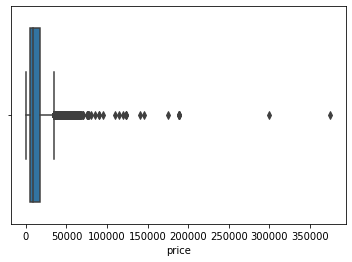

In [85]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price'>

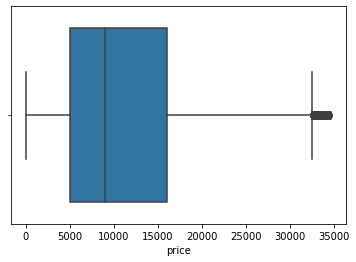

In [86]:
sns.boxplot(df_final['price'])

Dari boxplot sebelum dan sesudah menangani outlier, kita bisa melihat perbedaan yang cukup signifikan pada kolom 'price', dari boxplot terlihat banyak outlier yang hilang meskipun beberapa diantaranya masih tersisa. Untuk bisa menghapus semua outlier, kita bisa melakukan pengulangan proses menghilangkan outlier.

In [87]:
list_of_selected_column = ['price', 'age_car', 'odometer']

df_final_1 = df_final.copy()

for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower_whisker, upper_whisker = upper_lower_whisker(df_final, column)
    df_final_1 = df_final_1[(df_final_1[column] > lower_whisker) & (df_final_1[column] < upper_whisker )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  age_car
cleaning outlier on  age_car  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


In [88]:
df_final_1.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
count,46798.000000,46798.000000,46798.000000,46798.000000,46798.000000,46798.000000,46798.00000,46798.000000,46798.000000,46798.000000,46798.000000,46798.000000
mean,11166.683833,2010.253259,6.025728,112236.408842,0.480191,39.547267,2018.30606,15.463866,6.635305,8.084555,18900.915379,4.990171
std,7584.156586,4.792260,1.657096,50406.022236,0.499613,28.205103,0.46086,8.738102,3.470150,4.755407,15881.296176,0.221476
min,1.000000,1997.000000,3.000000,0.000000,0.000000,0.000000,2018.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,81715.500000,0.000000,19.000000,2018.00000,8.000000,3.000000,4.000000,10540.451797,5.000000
50%,8995.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,2018.00000,15.000000,7.000000,7.000000,15000.000000,5.000000
75%,15985.000000,2014.000000,8.000000,143178.500000,1.000000,53.000000,2019.00000,23.000000,10.000000,11.000000,21937.330357,5.000000
max,32485.000000,2019.000000,12.000000,238241.000000,1.000000,271.000000,2019.00000,31.000000,12.000000,21.000000,195700.000000,5.000000


<AxesSubplot:xlabel='price'>

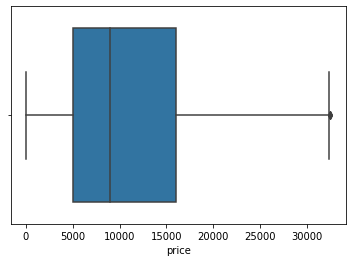

In [89]:
sns.boxplot(df_final_1['price'])

Setelah proses kedua dalam menangani outlier, outlier yang terlihat semakin mengecil. Untuk itu akan dicoba untuk mengulangi proses sekali lagi.

In [90]:
list_of_selected_column = ['price', 'age_car', 'odometer']

df_final_2 = df_final_1.copy()

for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower_whisker, upper_whisker = upper_lower_whisker(df_final_1, column)
    df_final_2 = df_final_2[(df_final_2[column] > lower_whisker) & (df_final_2[column] < upper_whisker )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  age_car
cleaning outlier on  age_car  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


<AxesSubplot:xlabel='price'>

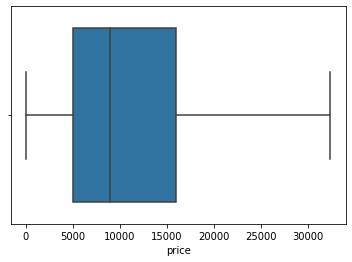

In [91]:
sns.boxplot(df_final_2['price'])

Dari boxplot terlihat bahwa outlier sudah tidak muncul dari kolom 'price'.

<AxesSubplot:xlabel='odometer'>

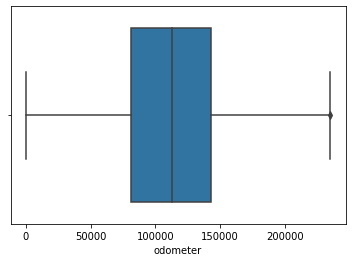

In [92]:
sns.boxplot(df_final_2['odometer'])

<AxesSubplot:xlabel='age_car'>

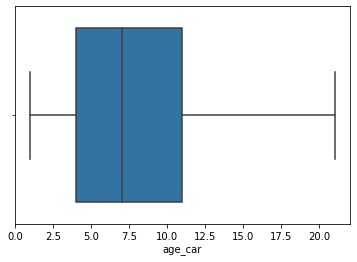

In [93]:
sns.boxplot(df_final_2['age_car'])

Dari kolom lainnya, hanya kolom 'odometer' saja yang masih memiliki outlier. Maka akan proses sebelumnya akan dilakukan lagi pada kolom 'odometer' saja.

In [94]:
list_of_selected_column = ['odometer']

df_final_3 = df_final_2.copy()

for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower_whisker, upper_whisker = upper_lower_whisker(df_final_2, column)
    df_final_3 = df_final_3[(df_final_3[column] > lower_whisker) & (df_final_3[column] < upper_whisker )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


<AxesSubplot:xlabel='odometer'>

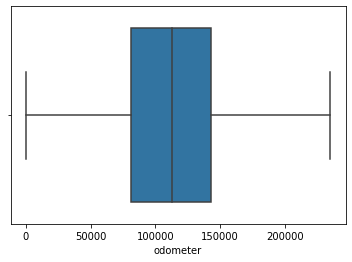

In [95]:
sns.boxplot(df_final_3['odometer'])

Outlier telah berhasil diatasi dengan melihat boxplot diatas.

In [96]:
df_final_3.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,date_ads,month_posted,age_car,average_distance,cond_category
count,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000,46706.000000
mean,11175.905622,2010.262450,6.024365,111999.493406,0.480045,39.542928,2018.306063,15.462403,6.634929,8.075429,18898.247986,4.990258
std,7583.706518,4.788969,1.657173,50160.259801,0.499607,28.198127,0.460861,8.738098,3.469636,4.752113,15893.677821,0.220488
min,1.000000,1997.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,81522.000000,0.000000,19.000000,2018.000000,8.000000,3.000000,4.000000,10526.315789,5.000000
50%,8995.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,2018.000000,15.000000,7.000000,7.000000,15000.000000,5.000000
75%,15990.000000,2014.000000,8.000000,143000.000000,1.000000,53.000000,2019.000000,23.000000,10.000000,11.000000,21932.458333,5.000000
max,32400.000000,2019.000000,12.000000,235125.000000,1.000000,271.000000,2019.000000,31.000000,12.000000,21.000000,195700.000000,5.000000


Ada kurang lebih hampir 9000 data yang hilang setelah outlier yang ada pada kolom 'price', 'age_car', dan 'odometer' diatasi.

## Mempelajari Parameter Inti Tanpa Outlier

**Perbandingan Kolom 'price'**

<AxesSubplot:xlabel='price'>

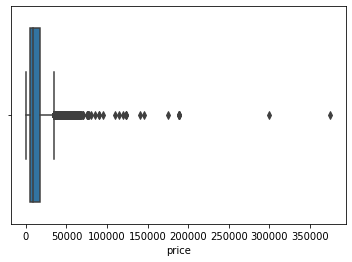

In [80]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price'>

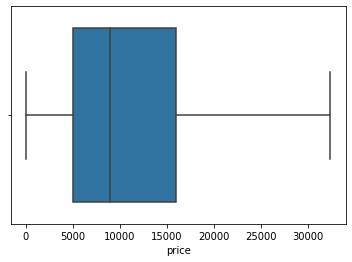

In [97]:
sns.boxplot(df_final_3['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

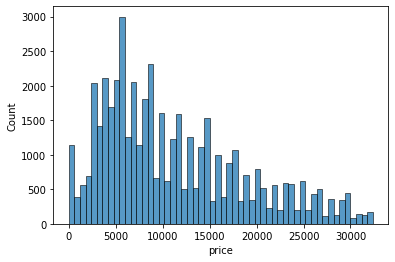

In [100]:
sns.histplot(df_final_3['price'])

Dengan membandingkan tabel sebelum dan sesudah difilter, kita menemukan beberapa perbedaan seperti nilai outlier yang berkurang drastis dari tabel awal. Walaupun masih ada outlier, tetapi grafik distribusi data sudah terlihat lebih baik dengan menghilangkan beberapa outlier.

**Perbandingan Kolom 'age_car'**

<AxesSubplot:xlabel='age_car'>

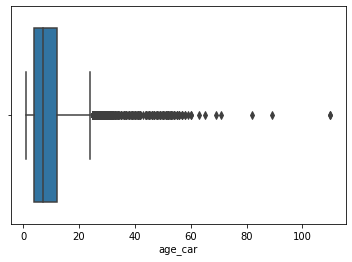

In [83]:
sns.boxplot(df['age_car'])

<AxesSubplot:xlabel='age_car'>

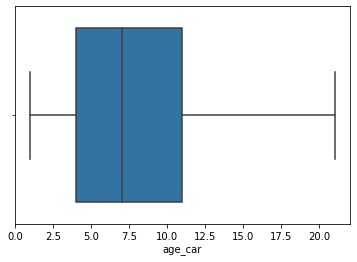

In [98]:
sns.boxplot(df_final_3['age_car'])

<AxesSubplot:xlabel='age_car', ylabel='Count'>

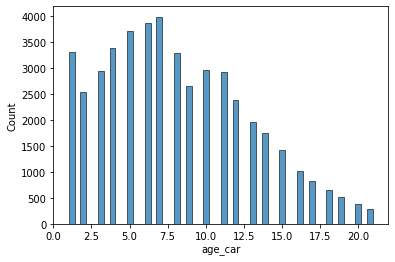

In [101]:
sns.histplot(df_final_3['age_car'])

Pada kolom 'age_car' juga masih terlihat adanya outlier tetapi sudah berkurang drastis dari sebelumnya. Pada grafik histogram pun juga terlihat bahwa datanya telah lebih baik serta distribusinya terlihat dengan sangat jelas.

**Perbandingan Kolom 'odometer'**

<AxesSubplot:xlabel='odometer'>

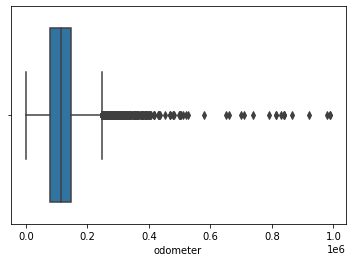

In [86]:
sns.boxplot(df['odometer'])

<AxesSubplot:xlabel='odometer'>

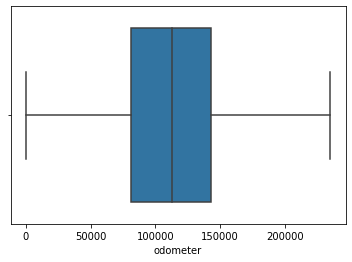

In [99]:
sns.boxplot(df_final_3['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

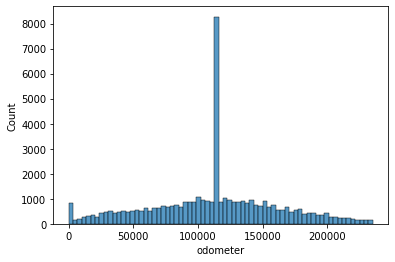

In [102]:
sns.histplot(df_final_3['odometer'])

Sama dengan kedua kolom sebelumnya, kolom 'odometer' pun juga terlihat membaik distribusi datanya meskipun masih ada beberapa outlier yang terlihat. Untuk dapat menghilangkan semua outlier bisa melakukan iterasi pada tahap filter data menggunakan kuartil.

## Masa Berlaku Iklan

In [103]:
df_final_3['days_listed'].describe()

count    46706.000000
mean        39.542928
std         28.198127
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Dari hasil diatas kita dapat melihat sebuah iklan umumnya terjual pada hari ke 40 setelah diposting. Iklan tercepat adalah 0 hari, dimana kemungkinan mobil terjual dalam hitungan jam dari iklan mulai diposting. Untuk iklan terlama yaitu 271 hari sejak dimulai post.

<AxesSubplot:xlabel='days_listed'>

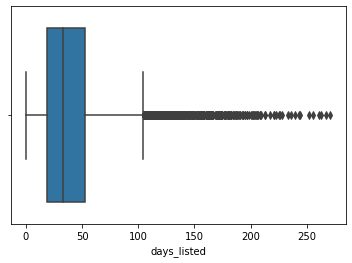

In [104]:
sns.boxplot(df_final_3['days_listed'])

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

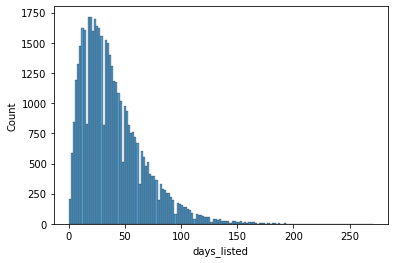

In [105]:
sns.histplot(df_final_3['days_listed'])

Dari tampilan boxplot terlihat banyak sekali outlier yang terdapat di kolom 'days_listed', yang menandakan adanya data dengan nilai yang cukup jauh dari rentang kuartilnya. Terlihat juga bahwa distribusi datanya cenderung menjulur ke arah kanan (positive skewness) karena whisker atas lebih panjang dan terdapat banyak outlier setelahnya. 

## Harga Rata-Rata Setiap Jenis Kendaraan

In [106]:
car_pivot_table = df_final_3.pivot_table(index='type', values='price', aggfunc=('mean', 'count')).sort_values(by='count', ascending=False)

In [107]:
car_pivot_table

,count,mean
type,,
sedan,11877.0,7020.212680
SUV,11549.0,10417.877046
truck,10533.0,15105.588911
pickup,5898.0,15012.012716
coupe,1956.0,13684.616053
wagon,1462.0,9105.673735
mini-van,1126.0,8120.460924
hatchback,995.0,6872.921608
van,573.0,8935.506108


<AxesSubplot:xlabel='type'>

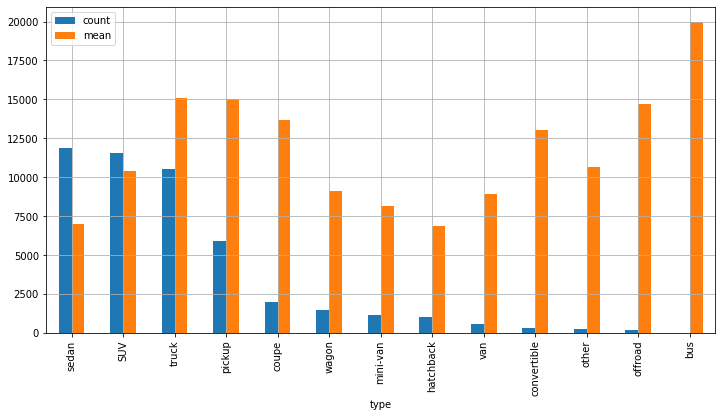

In [108]:
car_pivot_table.plot(kind='bar', grid=True, figsize=(12, 6))

Dari grafik diatas, dapat kita tarik kesimpulan bahwa sedan dan SUV menjadi odel yang paling banyak dijual. Untuk model sedan sendiri harga jual rata-ratanya sebesar setengah dari jumlah mobil yang dijual yaitu 7020.212 dengan jumlah iklan 11877. Dapat dilihat dari grafik juga bahwa rata-rata harga sedan adalah kedua terkecil dari keseluruhan rata-rata per model. Untuk model dengan rata-rata harga tertinggi adalah bus dengan nilai hampir mencapai 20.000 tetapi hanya ada 18 iklan dengan model kendaraan bus. 

## Faktor Harga

**Type Model Sedan**

In [109]:
df_final_sedan = df_final_3[df_final_3['type'] == 'sedan'].reset_index(drop=True)

In [110]:
df_final_sedan.corr()['price']

price               1.000000
model_year          0.617645
cylinders          -0.046140
odometer           -0.502924
is_4wd              0.034594
days_listed         0.000117
year_posted         0.016189
date_ads            0.005928
month_posted       -0.018489
age_car            -0.612292
average_distance    0.308283
cond_category       0.040884
Name: price, dtype: float64

Dari nilai korelasi yang ditampilkan untuk age_car dan odometer memiliki nilai negatif yang lebih dari setengah. Hal inin menyatakan bahwa semakin besar nilai age_car dan odometer maka 'price' dari kendaraan tersebut akan semakin turun. Hal ini terbilang masuk akal karena kendaraan tersebut bisa terbilang sudah tua atau sudah sering digunakan. Untuk kondisi tidak terlalu berpengaruh signifikan terhadap harga.

<AxesSubplot:xlabel='odometer', ylabel='price'>

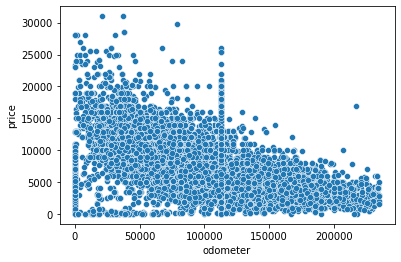

In [111]:
sns.scatterplot(data=df_final_sedan, x='odometer', y='price')

<AxesSubplot:xlabel='age_car', ylabel='price'>

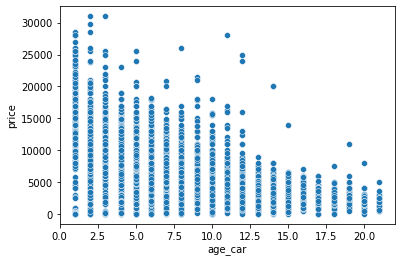

In [112]:
sns.scatterplot(data=df_final_sedan, x='age_car', y='price')

Kedua scatterplot age_car dan odometer yang diproyeksikan dengan price terlihat sangat jelas sesuai dengan korelasi yang kita dapat sebelumnya.

In [113]:
df_final_sedan['transmission'].value_counts()

automatic    11184
manual         562
other          131
Name: transmission, dtype: int64

<AxesSubplot:xlabel='price', ylabel='transmission'>

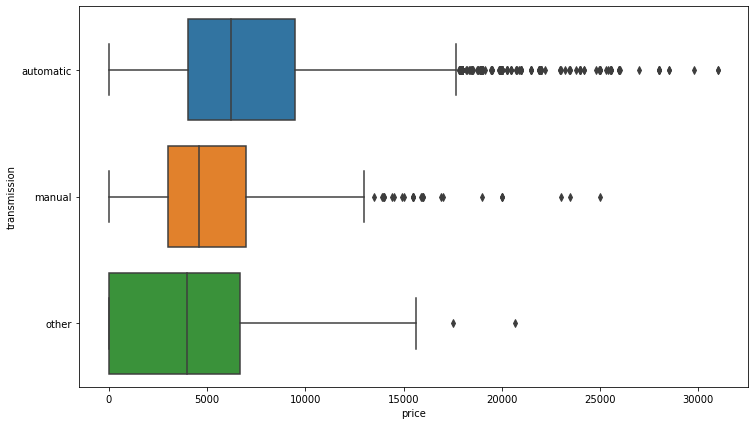

In [114]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_final_sedan, x='price', y='transmission')

Transmisi untuk model sedan didominasi oleh transmisi automatic. Untuk semua transmisi, memiliki outlier yang terlihat jelas dan distribusi datanya cenderung menjulur ke arah kanan (positive skewness).

In [115]:
df_final_sedan['paint_color'].value_counts()

unknown    2131
silver     2011
black      1746
grey       1599
white      1471
blue       1211
red         926
custom      292
brown       245
green       192
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [116]:
list_color_sedan = df_final_sedan['paint_color'].value_counts()[:-3].index

In [117]:
df_sedan_color = df_final_sedan[df_final_sedan['paint_color'].isin(list_color_sedan)].reset_index(drop=True)

<AxesSubplot:xlabel='price', ylabel='paint_color'>

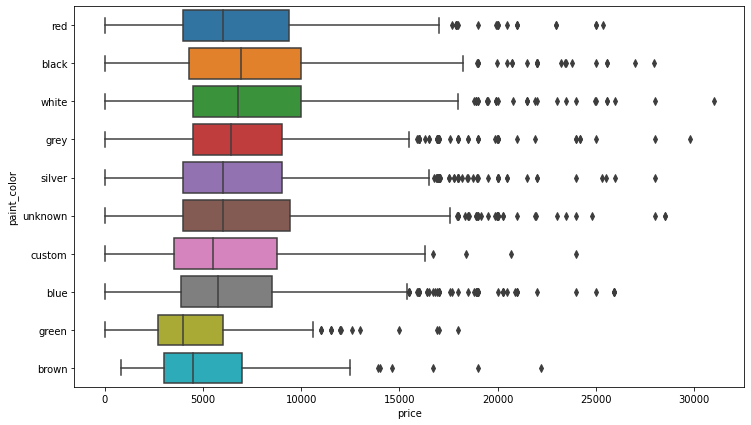

In [118]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_sedan_color, x='price', y='paint_color')

<AxesSubplot:xlabel='paint_color', ylabel='price'>

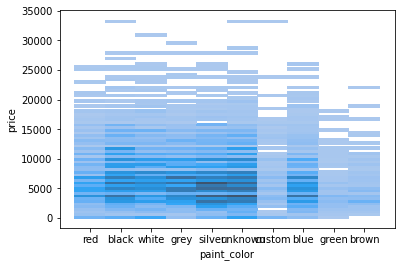

In [105]:
sns.histplot(data=df_sedan_color, x='paint_color', y='price')

Jika dilihat dari 'paint_color', didominasi oleh 'paint_color' unknown, yang mana sebelumnya adalah nilai yang hilang pada kolom 'paint_color'. Hal ini bisa disebabkan si pemilik memang tidak memasukkan warna dari kendaraannya. Dari distribusi datanya pun terlihat bahwa semuanya memiliki positive skewness dimana datanya cenderung ke arah kanan dan outliernya pun terlihat di sebelah kanan data. Harga tertinggi pun dimiliki oleh 3 warna seperti black, custom, dan unknown.

**Type Model SUV**

In [106]:
df_final_suv = df_final[df_final['type'] == 'SUV'].reset_index(drop=True)

In [107]:
df_final_suv.corr()['price']

price               1.000000
model_year          0.573712
cylinders           0.006924
odometer           -0.471808
is_4wd              0.115661
days_listed        -0.020317
year_posted         0.000418
date_ads            0.000843
month_posted       -0.006774
age_car            -0.573466
average_distance    0.276109
cond_category       0.040644
Name: price, dtype: float64

Sama dengan kendaraan dengan model sedan, model SUV memiliki korelasi yang sama untu age_car dan odometer. Dimana nilai korelasinya negatif yang berarti semakin besar nilai dari age_car atau odometer, 'price' dari kendaraan tersebut akan semakin kecil. Kondisi kendaraan tidak mempengaruhi banyak ada korelasi.

<AxesSubplot:xlabel='odometer', ylabel='price'>

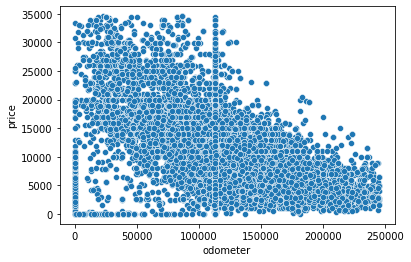

In [108]:
sns.scatterplot(data=df_final_suv, x='odometer', y='price')

<AxesSubplot:xlabel='age_car', ylabel='price'>

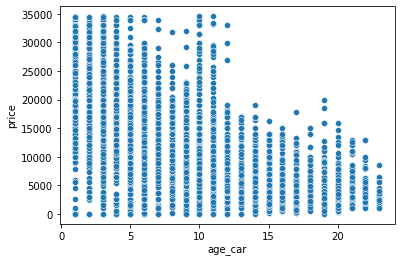

In [109]:
sns.scatterplot(data=df_final_suv, x='age_car', y='price')

Dari dua scatterplot diatas membuktikan lebih jelas korelasi 'price' dengan 'odometer' dan 'age_car'.

In [110]:
df_final_suv['transmission'].value_counts()

automatic    11186
manual         456
other          158
Name: transmission, dtype: int64

Untuk model SUV juga didominasi oleh tansmisi automatic.

<AxesSubplot:xlabel='price', ylabel='transmission'>

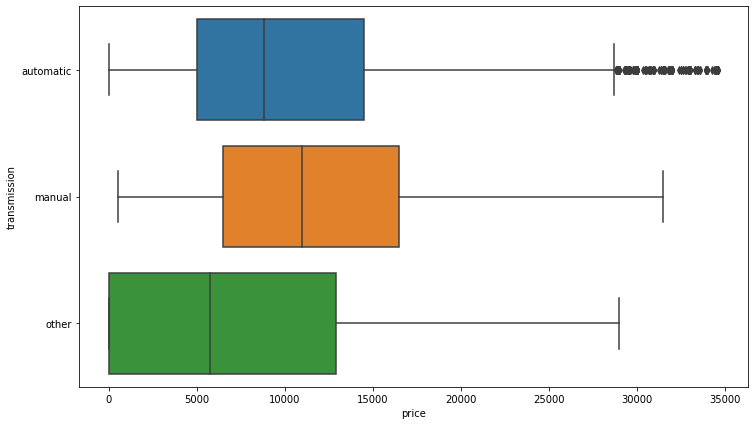

In [111]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_final_suv, x='price', y='transmission')

Dari boxplot untuk setiap transmisi terlihat sekali banyak outlier pada jenis transmisi automatic. Pada transmisi manual dan other, kita tidak melihat adanya outlier yang menandakan tidak adanya nilai yang ekxtrim pada sebaran data. Keseluruhan data memiliki positif skewness.

In [112]:
df_final_suv['paint_color'].value_counts()

unknown    2126
black      2078
white      1851
silver     1523
grey       1141
blue       1002
red         861
green       409
brown       349
custom      297
orange       81
yellow       45
purple       37
Name: paint_color, dtype: int64

In [113]:
list_suv_color = df_final_suv['paint_color'].value_counts()[:-3].index

In [114]:
df_suv_color = df_final_suv[df_final_suv['paint_color'].isin(list_suv_color)].reset_index(drop=True)

<AxesSubplot:xlabel='price', ylabel='paint_color'>

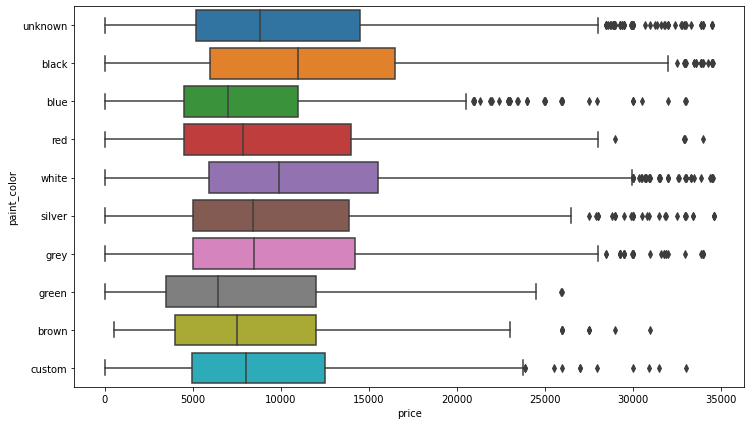

In [115]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_suv_color, x='price', y='paint_color')

<AxesSubplot:xlabel='paint_color', ylabel='price'>

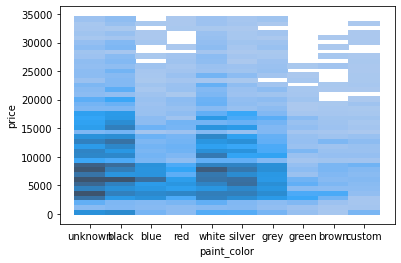

In [116]:
sns.histplot(data=df_suv_color, x='paint_color', y='price')

Sama seperti dengan model sedan, model SUV juga didominasi oleh 'paint_color' unknown. Boxplot juga menandakan keseluruhan kategory warna memiliki outlier. Untuk paint_color dengan harga tertinggi dimiliki oleh warna-warna seperti black, red, silver, grey, dan unknown.

## Kesimpulan Umum

Kesimpulan dari data di atas adalah:
- Data dari penjualan mobil memiliki beberapa nilai yang hilang di kolom-kolomnya seperti pada kolom 'is_4wd' yang merupakan kolom dengan nilai yang hilang terbanyak, selanjutnya ada kolom 'paint_color', 'model_year', 'odometer', dan 'cylinders'. Sebelum mengganti nilai yang hilang akan dilakukan observasi lebih lanjut untuk bisa mendapatkan cara yang tepat dalam mengisi nilai yang hilang tersebut.
- Observasi yang dilakukan adalah dengan mencari tahu isi dari kolom yang hilang, keterkaitannya dengan kolom lain, dan menentukan faktor yang membuat nilai tersebut hilang.
- Rata-rata waktu penjualan sebuah mobil adalah 40 hari sejak muali diposting, dengan 0 hari sebagai yang tercepat dan 271 hari sebagai yang paling lama. 0 hari disini menyatakan bahwa mobil tersebut terjual dalam hitungan jam, dan dibawah 1 hari.
- Terdapat outlier dalam beberapa parameter inti dalam tabel penjualan mobil. Outlier tersebut bisa kita temui pada kolom 'odometer', 'age_car', dan 'price'. Untuk bisa mengurangi jumlah outlier, kita akan memfilter tabel dengan perhitungan IQR yang didapat dari Q1 dan Q3 untuk setiap parameter.
- Meskipun sudah difilter, kita masih menemukan outlier pada parameter tersebut, akan tetapi perbedaan grafiknya sudah cukup terlihat jelas dengan membuang beberapa outlier. Untuk bisa menghilangkan keseluruhan outlier, kita bisa melakukan iterasi perhitungan IQR hingga outlier tiak terlihat kembali.
- Dengan memeriksa keseluruhan isi dari kolom pada tabel, kita mendapatkan beberapa faktor yang mempengaruhi penjualan sebuah mobil. Dari tabel kita melihat bahwa sedan dan SUV menjadi 2 model yang paling banyak dijual dan bus adalah model yang paling sedikit dijual.
- Untuk sedan dan SUV, harga dari penjualan dipengaruhi oleh nilai korelasi odometer dan age_car. Kedua nilai korelasi yang nilainya lebih dari -0,5 yang menyatakan bahwa semakin besar nilai odometer dan age_car maka price dari mobil tersebut akan semakin turun.
- Kedua model didominasi oleh transmisi automatic dan warna kendaraan unknown. Warna unknown ini muncul karena pada kolom 'paint_color' terdapat banyak nilai yang hilang, sedangkan untuk 'paint_color' sendiri kita tidak bisa mengisi dengan cara memprediksi atau melihat tabel lainnya, mengingat hanya penjual lah yang tahu pasti warna dari kendaraan tersebut.